# Laburo con los datos experimentales

El objetivo de éste notebook es trabajar con los resultados experimentales (generados con `exp_k_alpha.py`). El código que genera los gráficos disponibles en el informe debería estar en su completitud aquí.

Primero que todo tenemos que cargar los datos experimentales:

In [1]:
from pickle import load
from gzip import open as zopen

with zopen('data.pickle.gz') as file:
    df = load(file)

df

,kind,k,alpha,elapsed_time,pca_init_and_fit_time,pca_transform_time,knn_init_and_fit_time,knn_predict_time,y_pred,y_test,y_fold_pred,y_fold_test
0,knnpca,1,1.0,5473120128,2.598776e+09,235056397.0,187226,2639100516,"[7.0, 0.0, 2.0, 2.0, 7.0, 1.0, 7.0, 2.0, 9.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 4.0, 5.0, 1.0, 8.0, 7.0, 6.0, 7.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
1,knnpca,2,1.0,5575963044,2.598776e+09,235056397.0,146870,2741983788,"[1.0, 0.0, 2.0, 2.0, 7.0, 1.0, 3.0, 2.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 4.0, 5.0, 1.0, 3.0, 7.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
2,knnpca,3,1.0,5737825042,2.598776e+09,235056397.0,185627,2903807029,"[1.0, 0.0, 2.0, 2.0, 7.0, 1.0, 3.0, 2.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[1.0, 6.0, 5.0, 1.0, 3.0, 3.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
3,knnpca,4,1.0,5679472451,2.598776e+09,235056397.0,232890,2845407175,"[1.0, 0.0, 2.0, 2.0, 7.0, 7.0, 3.0, 5.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[7.0, 6.0, 5.0, 1.0, 8.0, 3.0, 6.0, 4.0, 3.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
4,knnpca,5,1.0,5718439245,2.598776e+09,235056397.0,205614,2884401245,"[1.0, 0.0, 2.0, 7.0, 7.0, 7.0, 5.0, 5.0, 0.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[7.0, 6.0, 5.0, 1.0, 8.0, 3.0, 6.0, 4.0, 4.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,knn,26,NaN,716552634872,NaN,NaN,209053599,716343581273,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4646,knn,27,NaN,660746681464,NaN,NaN,238334395,660508347069,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4647,knn,28,NaN,604904267144,NaN,NaN,213043046,604691224098,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."
4648,knn,29,NaN,566102875095,NaN,NaN,200959077,565901916018,"[9.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 2.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."


Los datos contienen tanto información de corridas utilizando tano KNN+PCA (`kind == 'knnpca'`) cómo KNN a secas (`kind == 'knn'`) así que separémoslos.

In [2]:
df_knnpca = df[df['kind'] == 'knnpca']
df_knn = df[df['kind'] == 'knn']

print(f'Hay {len(df_knnpca)} corridas usando KNN + PCA')
print(f'Hay {len(df_knn)} corridas usando KNN a secas')

Hay 4500 corridas usando KNN + PCA
Hay 150 corridas usando KNN a secas


Hecho ésto, podemos empezar a explorar los datos usando las bibliotecas de python de siempre.

In [3]:
# Importemos todo :P
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

### KNN

Los datos tienen toda la información de evaluación necesaria para evaluar diversas métricas. Podemos usar las implementaciones propias de scikit para trabajar con éstas.

In [4]:
from sklearn.metrics import accuracy_score

knn_accuracy_column = df_knn.apply(
    func=lambda row: accuracy_score(row['y_test'], row['y_pred']),
    axis=1
)
df_knn_accuracy = df_knn[['k']].copy()
df_knn_accuracy['accuracy'] = knn_accuracy_column
df_knn_accuracy

,k,accuracy
4500,1,0.961190
4501,2,0.954286
4502,3,0.962063
4503,4,0.960794
4504,5,0.961667
...,...,...
4645,26,0.946905
4646,27,0.946111
4647,28,0.945238
4648,29,0.944683


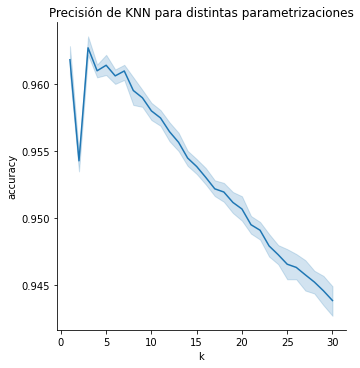

In [5]:
sns.relplot(data=df_knn_accuracy, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNN para distintas parametrizaciones')

In [6]:
max_knn_i = df_knn_accuracy['accuracy'].argmax()
max_knn_row = df_knn.iloc[max_knn_i]
print(max_knn_row)
print(df_knn_accuracy.iloc[max_knn_i])
max_knn_y_test = np.array(max_knn_row['y_test']).flatten()
df_max_knn = pd.DataFrame({'y_pred': max_knn_row['y_pred'], 'y_test': max_knn_y_test})

kind                                                                   knn
k                                                                        3
alpha                                                                  NaN
elapsed_time                                                  747080313272
pca_init_and_fit_time                                                  NaN
pca_transform_time                                                     NaN
knn_init_and_fit_time                                            333045028
knn_predict_time                                              746747268244
y_pred                   [7.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...
y_test                   [[7], [2], [9], [6], [9], [6], [3], [8], [6], ...
y_fold_pred              [5.0, 6.0, 8.0, 2.0, 5.0, 3.0, 5.0, 7.0, 2.0, ...
y_fold_test              [[5], [6], [8], [2], [5], [3], [5], [7], [2], ...
Name: 4592, dtype: object
k           3.000000
accuracy    0.964365
Name: 4592, dtype: float64


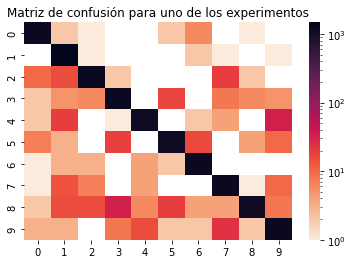

In [7]:
confusion = confusion_matrix(df_max_knn['y_test'], df_max_knn['y_pred'])

cmap = sns.cm.rocket_r
confusion_heatmap = sns.heatmap(confusion, norm=LogNorm(), cmap=cmap) \
                       .set(title='Matriz de confusión para uno de los experimentos')

### KNN + PCA

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo total')

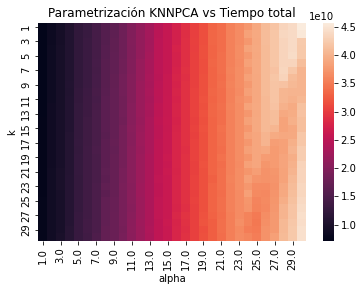

In [8]:
tiempos_totales = df_knnpca.pivot_table(index='k', columns='alpha', values='elapsed_time', aggfunc=np.mean)
sns.heatmap(tiempos_totales).set_title('Parametrización KNNPCA vs Tiempo total')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

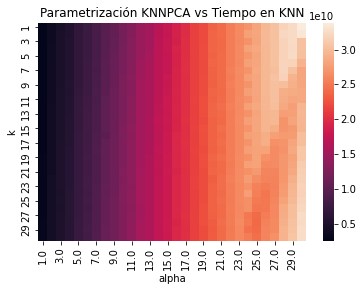

In [9]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='knn_predict_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

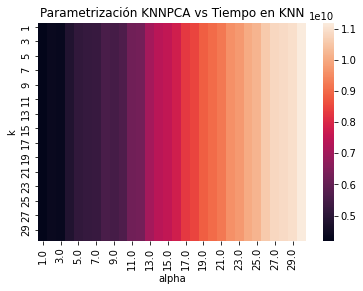

In [10]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='pca_init_and_fit_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

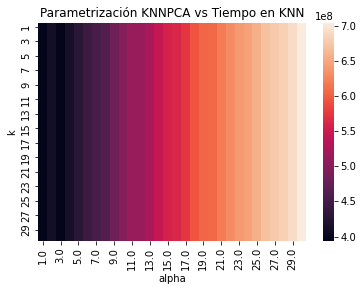

In [11]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='pca_transform_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

Text(0.5, 1.0, 'Parametrización KNNPCA vs Tiempo en KNN')

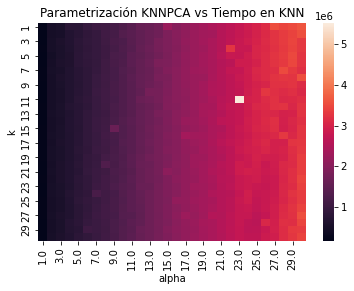

In [12]:
tiempos_predict = df_knnpca.pivot_table(index='k', columns='alpha', values='knn_init_and_fit_time', aggfunc=np.mean)
sns.heatmap(tiempos_predict).set_title('Parametrización KNNPCA vs Tiempo en KNN')

In [13]:
df_knnpca

df_knnpca_accuracy_column = df_knnpca.apply(
    func=lambda row: accuracy_score(row['y_test'], row['y_pred']),
    axis=1
)
df_knnpca_accuracy = df_knnpca[['k']].copy()
df_knnpca_accuracy['alpha'] = df_knnpca['alpha']
df_knnpca_accuracy['accuracy'] = df_knnpca_accuracy_column

df_knnpca_accuracy

,k,alpha,accuracy
0,1,1.0,0.248254
1,2,1.0,0.264365
2,3,1.0,0.268889
3,4,1.0,0.269762
4,5,1.0,0.271270
...,...,...,...
4495,26,30.0,0.959048
4496,27,30.0,0.957778
4497,28,30.0,0.957460
4498,29,30.0,0.957381


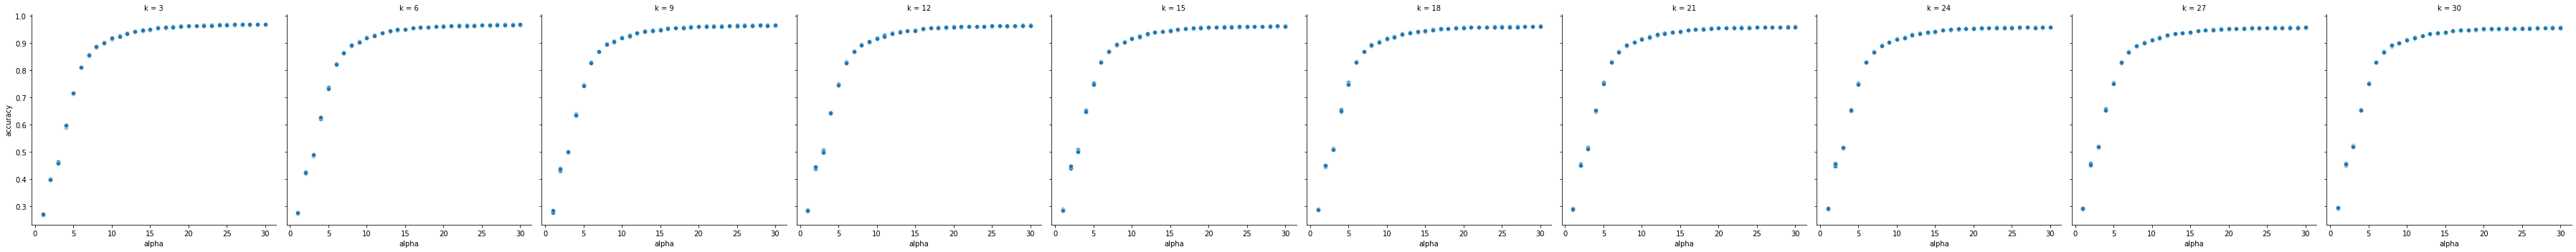

In [14]:
sns.relplot(x="alpha", y="accuracy", col="k", aspect=1, data=df_knnpca_accuracy.query("k%3 == 0"))

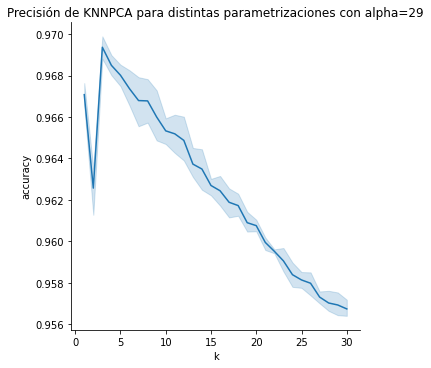

In [15]:
data = df_knnpca_accuracy[df_knnpca_accuracy['alpha'] == 29]

sns.relplot(data=data, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNNPCA para distintas parametrizaciones con alpha=29')

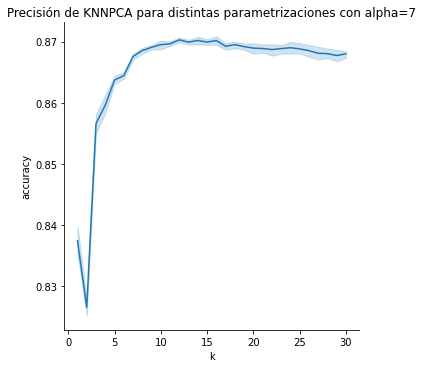

In [16]:
data = df_knnpca_accuracy[df_knnpca_accuracy['alpha'] == 7]

sns.relplot(data=data, x='k', y='accuracy', kind='line') \
   .set(title='Precisión de KNNPCA para distintas parametrizaciones con alpha=7')

In [17]:
max_knnpca_i = df_knnpca_accuracy['accuracy'].argmax()
max_knnpca_row = df_knnpca.iloc[max_knnpca_i]
print(max_knnpca_row)
print(df_knnpca_accuracy.iloc[max_knnpca_i])
max_knnpca_y_test = np.array(max_knnpca_row['y_test']).flatten()
df_max_knnpca = pd.DataFrame({'y_pred': max_knnpca_row['y_pred'], 'y_test': max_knnpca_y_test})

kind                                                                knnpca
k                                                                        4
alpha                                                                 28.0
elapsed_time                                                   43841195494
pca_init_and_fit_time                                        11385455696.0
pca_transform_time                                             691223390.0
knn_init_and_fit_time                                              3270078
knn_predict_time                                               31761246330
y_pred                   [4.0, 2.0, 9.0, 6.0, 9.0, 6.0, 3.0, 8.0, 6.0, ...
y_test                   [[7], [2], [9], [6], [9], [6], [3], [8], [6], ...
y_fold_pred              [5.0, 6.0, 8.0, 2.0, 5.0, 3.0, 5.0, 7.0, 2.0, ...
y_fold_test              [[5], [6], [8], [2], [5], [3], [5], [7], [2], ...
Name: 3693, dtype: object
k            4.000000
alpha       28.000000
accuracy     0.970317
Name: 36

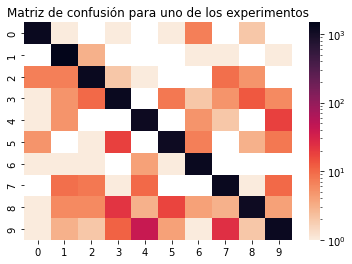

In [18]:
confusion = confusion_matrix(df_max_knnpca['y_test'], df_max_knnpca['y_pred'])

cmap = sns.cm.rocket_r
confusion_heatmap = sns.heatmap(confusion, norm=LogNorm(), cmap=cmap) \
                       .set(title='Matriz de confusión para uno de los experimentos')

## Experimentos

### 1. Cohen Kappa: KNN vs KNN + PCA

Lo que queremos ver con la Kappa de Cohen es ver si lo que predice KNN es similar a lo que predice KNN+PCA

In [19]:
cohen_kappa_score(df_max_knnpca['y_pred'], df_max_knn['y_pred'])

0.9677892896495495

Con el resultado obtenido vemos que el indice obtenido es muy alto pero esto era esperabla dado que ambos tienen muy buena performance. Entonces voy a comparar solo lo que fallo cado uno.

In [20]:
df_knn_knnpca_results = pd.DataFrame()
df_knn_knnpca_results['y_pred_knn'] = df_max_knn['y_pred']
df_knn_knnpca_results['y_pred_knnpca'] = df_max_knnpca['y_pred']
df_knn_knnpca_results['y_test'] = df_max_knnpca['y_test']
df_knn_knnpca_results

,y_pred_knn,y_pred_knnpca,y_test
0,7.0,4.0,7
1,2.0,2.0,2
2,9.0,9.0,9
3,6.0,6.0,6
4,9.0,9.0,9
...,...,...,...
12595,1.0,1.0,1
12596,6.0,6.0,6
12597,5.0,5.0,5
12598,0.0,0.0,0


In [21]:
df_knn_knnpca_results_fails = df_knn_knnpca_results[df_knn_knnpca_results.apply(
    lambda row: row['y_pred_knn'] != row['y_test'] and row['y_pred_knnpca'] != row['y_test'], axis=1)]
df_knn_knnpca_results_fails

,y_pred_knn,y_pred_knnpca,y_test
42,8.0,8.0,3
90,5.0,5.0,8
122,3.0,3.0,9
131,2.0,2.0,7
177,8.0,8.0,5
...,...,...,...
12336,0.0,0.0,3
12344,1.0,1.0,9
12372,4.0,4.0,9
12469,0.0,5.0,8


In [22]:
cohen_kappa_score(df_knn_knnpca_results_fails['y_pred_knn'], df_knn_knnpca_results_fails['y_pred_knnpca'])

0.8360407869747202

### 2. Cohen Kappa: KNN + PCA, First vs Second

Aca vamos a comparar los 2 mejores clasificadores de KNN + PCA para ver si hay o no correlacion entre ellos.

In [34]:
df_knnpca_accuracy_wo_max = df_knnpca_accuracy[df_knnpca_accuracy['accuracy'] < 0.97]
max_sec_knnpca_i = df_knnpca_accuracy_wo_max['accuracy'].argmax()
max_sec_knnpca_row = df_knnpca.iloc[max_sec_knnpca_i]
print(max_sec_knnpca_row)
print(df_knnpca_accuracy.iloc[max_sec_knnpca_i])
max_sec_knnpca_y_test = np.array(max_sec_knnpca_row['y_test']).flatten()

df_max_sec_knnpca = pd.DataFrame({'y_pred': max_sec_knnpca_row['y_pred'], 'y_test': max_sec_knnpca_y_test})

kind                                                                knnpca
k                                                                       30
alpha                                                                  7.0
elapsed_time                                                   15309369832
pca_init_and_fit_time                                         5505306087.0
pca_transform_time                                             464436268.0
knn_init_and_fit_time                                               968528
knn_predict_time                                                9338658949
y_pred                   [9.0, 8.0, 9.0, 6.0, 9.0, 6.0, 8.0, 8.0, 6.0, ...
y_test                   [[7], [2], [9], [6], [9], [6], [3], [8], [6], ...
y_fold_pred              [8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 6.0, 7.0, ...
y_fold_test              [[8], [7], [1], [0], [7], [2], [8], [2], [7], ...
Name: 3749, dtype: object
k           30.000000
alpha        7.000000
accuracy     0.866825
Name: 37

In [35]:
df_knnpca_accuracy_wo_max

,k,alpha,accuracy
0,1,1.0,0.248254
1,2,1.0,0.264365
2,3,1.0,0.268889
3,4,1.0,0.269762
4,5,1.0,0.271270
...,...,...,...
4495,26,30.0,0.959048
4496,27,30.0,0.957778
4497,28,30.0,0.957460
4498,29,30.0,0.957381


In [24]:
cohen_kappa_score(df_max_knnpca['y_pred'], df_max_sec_knnpca['y_pred'])

0.8613867840989538

In [25]:
df_knnpca_knnpca_sec_results = pd.DataFrame()
df_knnpca_knnpca_sec_results['y_pred_knnpca'] = df_max_knnpca['y_pred']
df_knnpca_knnpca_sec_results['y_pred_knnpca_sec'] = df_max_sec_knnpca['y_pred']
df_knnpca_knnpca_sec_results['y_test'] = df_max_knnpca['y_test']
df_knnpca_knnpca_sec_results

,y_pred_knnpca,y_pred_knnpca_sec,y_test
0,4.0,9.0,7
1,2.0,8.0,2
2,9.0,9.0,9
3,6.0,6.0,6
4,9.0,9.0,9
...,...,...,...
12595,1.0,1.0,1
12596,6.0,6.0,6
12597,5.0,5.0,5
12598,0.0,0.0,0


In [26]:
df_knnpca_knnpca_sec_results_fails = df_knnpca_knnpca_sec_results[df_knnpca_knnpca_sec_results.apply(
    lambda row: row['y_pred_knnpca_sec'] != row['y_test'] and row['y_pred_knnpca'] != row['y_test'], axis=1)]
df_knnpca_knnpca_sec_results_fails

,y_pred_knnpca,y_pred_knnpca_sec,y_test
0,4.0,9.0,7
42,8.0,8.0,3
90,5.0,2.0,8
122,3.0,3.0,9
131,2.0,2.0,7
...,...,...,...
12344,1.0,1.0,9
12372,4.0,1.0,9
12411,5.0,0.0,3
12469,5.0,5.0,8


In [27]:
cohen_kappa_score(df_knnpca_knnpca_sec_results_fails['y_pred_knnpca_sec'], df_knnpca_knnpca_sec_results_fails['y_pred_knnpca'])

0.6051982147545287

### 3. Cohen Kappa: KNN + PCA, Two of the same fold

In [28]:
k30_a7_rows = df_knnpca[df_knnpca['k'] == 30]
k30_a7_rows = k30_a7_rows[k30_a7_rows['alpha'] == 7]
k30_a7_rows

,kind,k,alpha,elapsed_time,pca_init_and_fit_time,pca_transform_time,knn_init_and_fit_time,knn_predict_time,y_pred,y_test,y_fold_pred,y_fold_test
209,knnpca,30,7.0,15261672667,4.985423e+09,407262231.0,1027061,9867959901,"[7.0, 8.0, 9.0, 6.0, 9.0, 6.0, 8.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[5.0, 9.0, 8.0, 1.0, 2.0, 9.0, 3.0, 8.0, 7.0, ...","[[2], [9], [3], [1], [2], [9], [5], [8], [7], ..."
1049,knnpca,30,7.0,15360901562,5.349633e+09,481465976.0,1001440,9528801384,"[7.0, 2.0, 9.0, 6.0, 9.0, 6.0, 8.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[6.0, 8.0, 2.0, 5.0, 1.0, 9.0, 5.0, 7.0, 8.0, ...","[[0], [8], [2], [5], [1], [9], [5], [7], [3], ..."
1919,knnpca,30,7.0,14230332101,4.897330e+09,455623864.0,969846,8876408427,"[9.0, 8.0, 9.0, 6.0, 9.0, 6.0, 8.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[4.0, 8.0, 5.0, 6.0, 4.0, 1.0, 4.0, 7.0, 7.0, ...","[[4], [8], [7], [6], [4], [1], [4], [7], [7], ..."
2849,knnpca,30,7.0,15006993167,5.349177e+09,461368898.0,953138,9195494390,"[7.0, 8.0, 9.0, 6.0, 9.0, 6.0, 8.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[5.0, 6.0, 8.0, 2.0, 5.0, 3.0, 5.0, 7.0, 2.0, ...","[[5], [6], [8], [2], [5], [3], [5], [7], [2], ..."
3749,knnpca,30,7.0,15309369832,5.505306e+09,464436268.0,968528,9338658949,"[9.0, 8.0, 9.0, 6.0, 9.0, 6.0, 8.0, 8.0, 6.0, ...","[[7], [2], [9], [6], [9], [6], [3], [8], [6], ...","[8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 6.0, 7.0, ...","[[8], [7], [1], [0], [7], [2], [8], [2], [7], ..."


In [29]:
max_sec2_knnpca_row = df_knnpca.iloc[2849]
print(max_sec_knnpca_row)
print(df_knnpca_accuracy.iloc[2849])
max_sec2_knnpca_y_test = np.array(max_sec2_knnpca_row['y_test']).flatten()

df_max_sec2_knnpca = pd.DataFrame({'y_pred': max_sec2_knnpca_row['y_pred'], 'y_test': max_sec2_knnpca_y_test})

kind                                                                knnpca
k                                                                       30
alpha                                                                  7.0
elapsed_time                                                   15309369832
pca_init_and_fit_time                                         5505306087.0
pca_transform_time                                             464436268.0
knn_init_and_fit_time                                               968528
knn_predict_time                                                9338658949
y_pred                   [9.0, 8.0, 9.0, 6.0, 9.0, 6.0, 8.0, 8.0, 6.0, ...
y_test                   [[7], [2], [9], [6], [9], [6], [3], [8], [6], ...
y_fold_pred              [8.0, 7.0, 1.0, 0.0, 7.0, 2.0, 8.0, 6.0, 7.0, ...
y_fold_test              [[8], [7], [1], [0], [7], [2], [8], [2], [7], ...
Name: 3749, dtype: object
k           30.000000
alpha        7.000000
accuracy     0.868571
Name: 28

In [30]:
cohen_kappa_score(df_max_sec2_knnpca['y_pred'], df_max_sec_knnpca['y_pred'])

0.9680495930389413

In [31]:
df_knnpca_sec_knnpca_sec2_results = pd.DataFrame()
df_knnpca_sec_knnpca_sec2_results['y_pred_knnpca_sec'] = df_max_sec2_knnpca['y_pred']
df_knnpca_sec_knnpca_sec2_results['y_pred_knnpca_sec2'] = df_max_sec_knnpca['y_pred']
df_knnpca_sec_knnpca_sec2_results['y_test'] = df_max_knnpca['y_test']
df_knnpca_sec_knnpca_sec2_results

,y_pred_knnpca_sec,y_pred_knnpca_sec2,y_test
0,7.0,9.0,7
1,8.0,8.0,2
2,9.0,9.0,9
3,6.0,6.0,6
4,9.0,9.0,9
...,...,...,...
12595,1.0,1.0,1
12596,2.0,6.0,6
12597,5.0,5.0,5
12598,0.0,0.0,0


In [32]:
df_knnpca_sec_knnpca_sec2_results_fails = df_knnpca_sec_knnpca_sec2_results[df_knnpca_sec_knnpca_sec2_results.apply(
    lambda row: row['y_pred_knnpca_sec'] != row['y_test'] and row['y_pred_knnpca_sec2'] != row['y_test'], axis=1)]
df_knnpca_sec_knnpca_sec2_results_fails

,y_pred_knnpca_sec,y_pred_knnpca_sec2,y_test
1,8.0,8.0,2
6,8.0,8.0,3
38,8.0,8.0,3
42,8.0,8.0,3
53,9.0,9.0,4
...,...,...,...
12562,1.0,1.0,3
12564,9.0,9.0,4
12568,8.0,8.0,3
12572,8.0,8.0,3


In [33]:
cohen_kappa_score(df_knnpca_sec_knnpca_sec2_results_fails['y_pred_knnpca_sec'], 
                  df_knnpca_sec_knnpca_sec2_results_fails['y_pred_knnpca_sec2'])

0.9549119504150421